# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

This report is going to explore the TMDB_Movies dataset to analyze the performance of different movies. The wrangled dataset will be presented first to give a clear view of how the dataset looks like. Then I will dive into some features that might impact the movie's performance. Graphs and charts will be presented along with descriptive explanations.

#### Questions to explore:
- Which movie has the highest revenue? Which genre has the highest revenue?
- Which movie is the most popular one? Which genre is more popular than others?
- Which genre is more profitable than others?
- What genre lables are more frequently being used?
- What is the tendency for Action and Adventure movies by years?


<a id='wrangling'></a>
### Data Wrangling

#### Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


##### Initial Analysis - Columns: From a high level look, there are some columns that we don't need to look at, so drop these columns first for a cleaner look

In [3]:
# drop columns that are not going to use
df.drop(['id','imdb_id','keywords','homepage','tagline','overview'],axis=1,inplace=True)
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Fix missing value

In [4]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# Cast, director, genres and production_companies are descriptive fields. Just indicate blank fields are "Blank" to proceed
df['cast']=df['cast'].fillna('BLANK')
df['director']=df['director'].fillna('BLANK')
df['genres']=df['genres'].fillna('BLANK')
df['production_companies']=df['production_companies'].fillna('BLANK')

In [6]:
# check again
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

##### Drop rows which revenue are budget value is zero

In [7]:
# clean the dataset to filter to exclude items which have zero on budget_adj and revenue_adj
# Check how many rows we have as zero for budget_adj and revenue_adj
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# drop rows if budget_adj or revenue_adj is zero in the dataset

df1=df[df.budget_adj!=0]
df=df1[df1.revenue_adj!=0]

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


##### Check duplicated items

In [9]:
# check duplicated rows
sum(df.duplicated())

1

In [10]:
# drop duplicates in dataset
df.drop_duplicates(inplace=True)

C:\Users\sx867ab\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# check again
df.duplicated().sum()

0

##### Check datatype

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3854 non-null object
director                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3854 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 481.8+ KB


In [13]:
# check the datatype for a few shown as object

# check release_date datatype - looks like we need to translate it to correct format
type(df['release_date'][0])

str

Per analysis the following datatypes need to be updated:
- budget: int to float
- revenue: int to float
- release_date: str to date
- budget_adj and revenue_adj: update to correct presentation

In [14]:
# convert budget, revenue columns from int to float

money=['budget','revenue']
for s in money:
    df[s]=df[s].astype(float)

C:\Users\sx867ab\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
# convert release_date from str to date

df['release_date']=pd.to_datetime(df['release_date'],format="%m/%d/%y")

C:\Users\sx867ab\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# fix budget_adj and revenue_adj

df['budget_adj']=df['budget_adj'].astype(float)

C:\Users\sx867ab\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3854 non-null object
director                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3854 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 641.8+ KB


##### Break down columns for genres

In [20]:
df_genre=df.set_index(df.columns.drop('genres',1).tolist()).genres.str.split('|',expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:,df.columns]
df_genre.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
2,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
3,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
4,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49


Logic here:
- drop genres column to the list
- split the column by '|' (Q: what is expand function here?)
- (Q: what is the stack function here?)
- reset index to append the columns at the end of the table
- rename the new column back to 'genres'
- put it back to the original position

Below is just for code breakdown - Question: how to break a super long code from one line to multiple rows?
- df.set_index(df.columns.drop('genres',1).tolist())
- .genres.str.split('|',expand=True)
- .stack()
- .reset_index()
- .rename(columns={0:'genres'})
- .loc[:,df.columns]

##### Save the file

In [21]:
df.to_csv('clean_tmdb_movies.csv')

In [22]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49


<a id='eda'></a>
### Data Analysis

#### Question 1: Which movie has the highest revenue? Which genre has the highest revenue?

##### Clean dataset for revenue analysis - drop all items whose revenue is zero

In [23]:
# find the best revenue movie
best_revenue=df['revenue_adj'].max()

In [24]:
df[df['revenue_adj']==best_revenue]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.43,237000000.00,2781505847.00,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,2009,240886902.89,2827123750.41


In [73]:
# find the best revenue movie genres
df2=df_genre.groupby('genres')['revenue_adj'].mean()
df2

genres
Action            195387938.30
Adventure         271407469.11
Animation         290957382.26
Comedy            121308528.54
Crime             110395135.21
Documentary        24806165.83
Drama             101378466.61
Family            243791030.52
Fantasy           249992751.60
Foreign            12733777.80
History           121661724.41
Horror             81406555.10
Music             134566015.89
Mystery           113621019.76
Romance           113519845.24
Science Fiction   202153142.41
TV Movie           58389103.04
Thriller          128170894.62
War               155898111.71
Western           135674767.39
Name: revenue_adj, dtype: float64

Text(0,0.5,'Revenue')

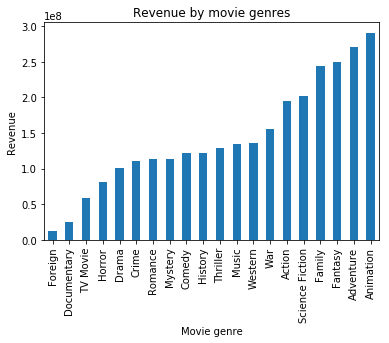

In [76]:
# get the bar chart for movie genres
df2=df2.iloc[df2.argsort()]
df2.plot(kind='bar')
plt.title('Revenue by movie genres')
plt.xlabel('Movie genre')
plt.ylabel('Revenue')

From the chart we can easily see that Animation, Adventure, Fantasy and Family genres have much more revenue than others

In [26]:
# find the first three genres which makes more revenues
df2.iloc[df2.argsort()[-3:]]

genres
Fantasy     249992751.60
Adventure   271407469.11
Animation   290957382.26
Name: revenue_adj, dtype: float64

We can see that animation made more revenue, followed by is adventure, the third place on the revenue rank is fantasy

In [77]:
# get the first three most earned movies

df.iloc[df['revenue_adj'].argsort()[-3:]]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,4.36,200000000.00,1845034188.00,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.30,1997,271692064.21,2506405735.42
1329,12.04,11000000.00,775398007.00,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.90,1977,39575591.36,2789712242.28
1386,9.43,237000000.00,2781505847.00,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.10,2009,240886902.89,2827123750.41


Findings about best rating: Per discovery Advenutres has the highest revenue compared with other genres, Avatar gets the best performance on revenue. But we'll need to take another look of budget later along with its revenue

#### Question 2: Which movie is the most popular one? Which genre is more popular than others?

In [78]:
# get the mean value for popularity for each genre
df_popularity=df_genre.groupby('genres')['popularity'].mean()
df_popularity

genres
Action            1.57
Adventure         1.87
Animation         1.71
Comedy            1.01
Crime             1.12
Documentary       0.29
Drama             1.00
Family            1.46
Fantasy           1.75
Foreign           0.18
History           0.97
Horror            0.85
Music             0.90
Mystery           1.14
Romance           0.95
Science Fiction   1.87
TV Movie          0.27
Thriller          1.26
War               1.25
Western           1.13
Name: popularity, dtype: float64

Text(0,0.5,'Popularity')

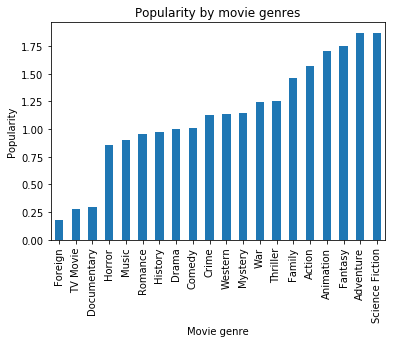

In [79]:
# get the bar chart for table above 
df_popularity=df_popularity.iloc[df_popularity.argsort()]
df_popularity.plot(kind='bar')
plt.title('Popularity by movie genres')
plt.xlabel('Movie genre')
plt.ylabel('Popularity')

In [29]:
# get the first three most popular movies
df_popularity[df_popularity.argsort()[-3:]]

genres
Fantasy           1.75
Adventure         1.87
Science Fiction   1.87
Name: popularity, dtype: float64

As we can see, the three most popular genres are Adventure(with highest popularity), Science Fiction and Fantasy

In [30]:
# A little deeper dig into the most popular movie
best_popularity=df['popularity'].max()

df[df['popularity']==best_popularity]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52


Jurassic World gets the best popularity award.:)

#### Question 3: Which genre is more profitable than others?

In [83]:
# Add another column for profit for each movie
df_genre['profit']=df_genre['revenue_adj']-df_genre['budget_adj']
df_genre.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
1,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
2,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
3,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
4,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21


In [84]:
# Get the mean value of profits for each genre
df_profit=df_genre.groupby('genres')['profit'].mean()
df_profit

genres
Action            128945315.33
Adventure         190151742.58
Animation         207485229.35
Comedy             82132064.14
Crime              70485067.28
Documentary        19426464.21
Drama              66666002.89
Family            172690036.45
Fantasy           169755235.39
Foreign             -164463.93
History            64781876.39
Horror             58165842.99
Music              99368000.67
Mystery            71258378.38
Romance            79615540.07
Science Fiction   136535918.49
TV Movie           51438019.34
Thriller           83569128.37
War                98625164.36
Western            68483701.99
Name: profit, dtype: float64

Text(0,0.5,'Profit')

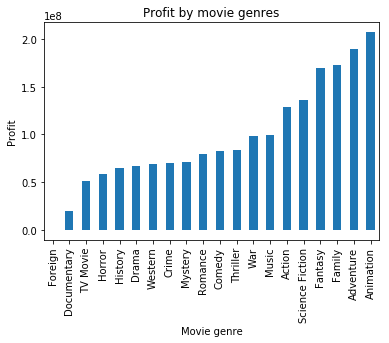

In [88]:
# get the bar chart for table above 
df_profit=df_profit.iloc[df_profit.argsort()]
df_profit.plot(kind='bar')
plt.title('Profit by movie genres')
plt.xlabel('Movie genre')
plt.ylabel('Profit')

#### Question 4: What genre lables are more frequently being used?

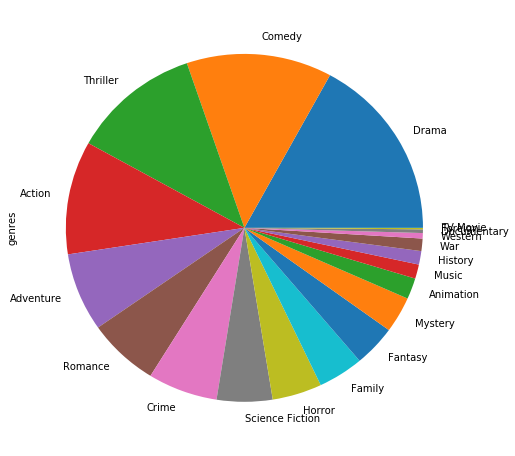

In [91]:
df_genre['genres'].value_counts().plot(kind='pie',figsize=(8,8))

From the chart we can easily see that more movies have label like Drama, Comedy, Thriller and Action.


#### Question 5: What is the tendency for Action and Adventure movies by years?

Text(0,0.5,'quantities')

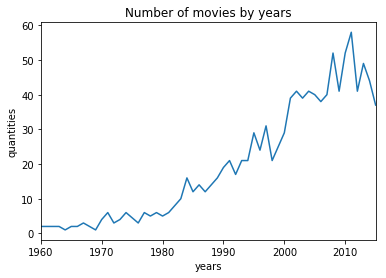

In [115]:
# numbers tendency for action movies
m=df_genre[df_genre['genres']=='Action'].groupby('release_year').count()

m['genres'].plot(kind='line')
plt.title('Number of movies by years')
plt.xlabel('years')
plt.ylabel('quantities')

Action movies are getting really popular especially after 1998, it reached the top around 2010 then there's a drop on the numbers recently

Text(0,0.5,'quantities')

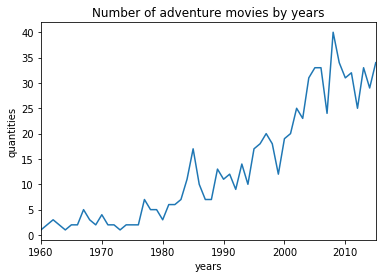

In [122]:
# numbers tendency for adventure movies
m=df_genre[df_genre['genres']=='Adventure'].groupby('release_year').count()

m['genres'].plot(kind='line')
plt.title('Number of adventure movies by years')
plt.xlabel('years')
plt.ylabel('quantities')

Adventure movie has more ups and downs - it has a big drop around 2010 but recently there are more adventure movies being produced again

<a id='conclusions'></a>
## Conclusions


This dataset is aiming to investigate which genre is more popular, has more revenue and profits and what's their tendency of production on the market.
Conclusions of the question put at the top are provided with visuals.
Interestingly, the most popular movie genre (scientific fiction) does not have the best performance on revenue and profit. The second place winner (adventure) has a better overall performance on both profit and popularity. Not many movies are labeled as adventure and the production has steep ups and downs.
However, I didn't notice apparent linear relationship between any two variables. 